# Explore here

                       Name  Popularity  Duration(m)
0                    Yellow          91       4.4462
1                    Sparks          91       3.7849
2              Viva La Vida          70       4.0396
3             The Scientist          89       5.1600
4  Something Just Like This          87       4.1193
5       A Sky Full of Stars          86       4.4644
6                   Fix You          86       4.9256
7                    Clocks          85       5.1313
8                  Paradise          85       4.6453
9   Adventure of a Lifetime          84       4.3964


                      Name  Popularity  Duration(m)
2             Viva La Vida          70       4.0396
9  Adventure of a Lifetime          84       4.3964
8                 Paradise          85       4.6453


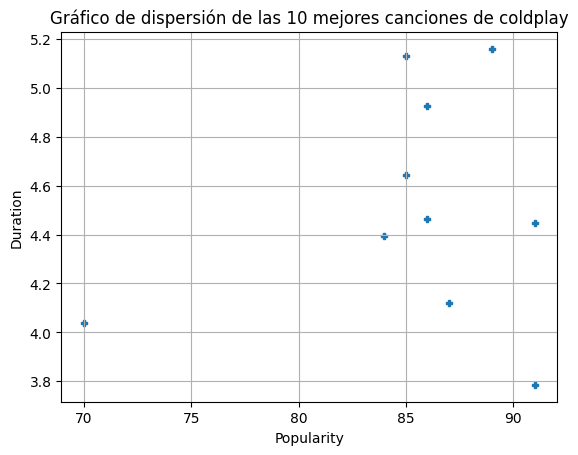

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Cargar las variables del archivo .env
load_dotenv()

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")
f_artist_coldplay_id = "4gzpq5DPGxSnKTe4SA8HAU"
top_songs_list = []
aux_dict = {}

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)

request = spotify.artist_top_tracks(f_artist_coldplay_id)

for song in request["tracks"]:
    aux_dict = {
    "Name": song["name"],
    "Popularity": song["popularity"],
    "Duration(m)": round(song["duration_ms"] / 60000, 4)
    }
    top_songs_list.append(aux_dict)
    aux_dict.clear

df_top_tracks = pd.DataFrame(top_songs_list)
print(df_top_tracks)
print("\n")
print(df_top_tracks.sort_values(by = 'Popularity', ascending=True, inplace=False).head(3))

plt.scatter( data=df_top_tracks, x="Popularity", y="Duration(m)", marker="P", s=15)
plt.grid(True)
plt.title("Gráfico de dispersión de las 10 mejores canciones de coldplay")
plt.xlabel("Popularity")
plt.ylabel("Duration")
plt.show()
#No hay relación directa entre entre la duración y la popularidad de la canción


                       Name  Popularity  Duration(m)
0                    Yellow          91       4.4462
1                    Sparks          91       3.7849
2              Viva La Vida          70       4.0396
3             The Scientist          89       5.1600
4  Something Just Like This          87       4.1193
5       A Sky Full of Stars          86       4.4644
6                   Fix You          86       4.9256
7                    Clocks          85       5.1313
8                  Paradise          85       4.6453
9   Adventure of a Lifetime          84       4.3964


                      Name  Popularity  Duration(m)
2             Viva La Vida          70       4.0396
9  Adventure of a Lifetime          84       4.3964
8                 Paradise          85       4.6453


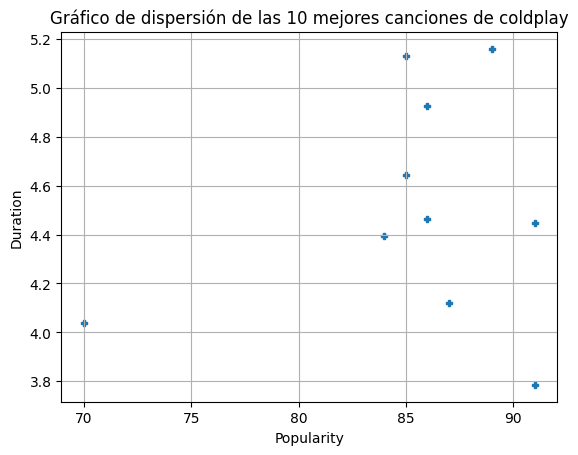

In [4]:
import requests
import base64
from secrets import *

# Autorizacion
url = "https://accounts.spotify.com/api/token"
headers = {}
data = {}

# Codificar con Base64
message = f"{client_id}:{client_secret}"
messageBytes = message.encode('ascii')
base64Bytes = base64.b64encode(messageBytes)
base64Message = base64Bytes.decode('ascii')


headers['Authorization'] = f"Basic {base64Message}"
data['grant_type'] = "client_credentials"

r = requests.post(url, headers=headers, data=data)

token = r.json()['access_token']

# Usar la autorizacion para recuperar los valores de la api

top_tracks_url = "https://api.spotify.com/v1/artists/4gzpq5DPGxSnKTe4SA8HAU/top-tracks"
headers = {
    "Authorization": "Bearer " + token
}

res = requests.get(url=top_tracks_url, headers=headers)
top_tracks_list = res.json()
top_songs_list2=[]

for song in top_tracks_list["tracks"]:
    
    top_songs_list2.append({
    "Name": song["name"],
    "Popularity": song["popularity"],
    "Duration(m)": round(song["duration_ms"] / 60000, 4)
    })

df_top_tracks2 = pd.DataFrame(top_songs_list2)
print(df_top_tracks2)
print("\n")
print(df_top_tracks2.sort_values(by = 'Popularity', ascending=True, inplace=False).head(3))

plt.scatter( data=df_top_tracks2, x="Popularity", y="Duration(m)", marker="P", s=15)
plt.grid(True)
plt.title("Gráfico de dispersión de las 10 mejores canciones de coldplay")
plt.xlabel("Popularity")
plt.ylabel("Duration")
plt.show()